## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimendata=data.groupby(["Drug Regimen"])
mean=regimendata["Tumor Volume (mm3)"].mean()
med=regimendata["Tumor Volume (mm3)"].median()
var=regimendata["Tumor Volume (mm3)"].var()
std=regimendata["Tumor Volume (mm3)"].std()
datasem=regimendata["Tumor Volume (mm3)"].sem()
describedata=pd.DataFrame({"mean":mean,"median":med,"variance":var,"standard deviation":std,"SEM":datasem})
describedata

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

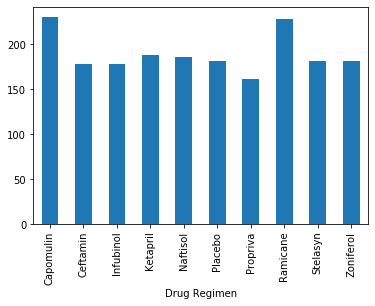

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimencount=regimendata["Mouse ID"].count()
barplot=regimencount.plot(kind="bar")

([<matplotlib.axis.XTick at 0x19eca3c8348>,
 <a list of 10 Text xticklabel objects>)

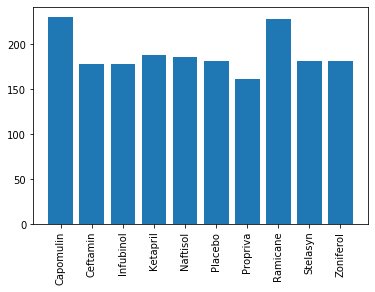

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x=[1,2,3,4,5,6,7,8,9,10]
plt.bar(x,regimencount)
tickloc=[value for value in x]
plt.xticks(tickloc,["Capomulin","Ceftamin","Infubinol","Ketapril",'Naftisol',"Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation=90)

## Pie plots

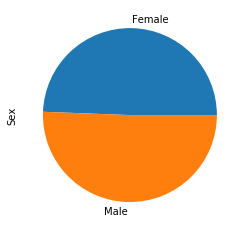

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sexdata=data.groupby(['Sex'])
sexcount=sexdata["Sex"].count()
barplot=sexcount.plot(kind="pie")

([<matplotlib.patches.Wedge at 0x19ecb48ed08>,
 [Text(0.02099250347258556, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')])

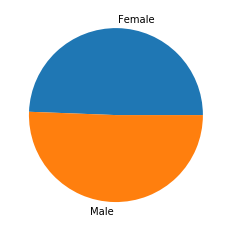

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label=["Female","Male"]
plt.pie(sexcount,labels=label)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiledata=data[(data["Timepoint"]==45)&(data["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"]))]

lowerq=quartiledata.quantile([.25])
upperq=quartiledata.quantile([.75])
iqr=upperq-lowerq
lowerbound=lowerq-1.5*iqr
upperbound=upperq+1.5*iqr
outlier= quartiledata[(quartiledata['Tumor Volume (mm3)'] < lowerbound) | (quartiledata['Tumor Volume (mm3)'] > upperbound)]
print(f"The potential outliers is {outlier['Tumor Volume (mm3)'].min()}")

The potential outliers is nan


{'whiskers': [<matplotlib.lines.Line2D at 0x19ecb5dfc88>,
 'caps': [<matplotlib.lines.Line2D at 0x19ecb5e4f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ecb5a8308>],
 'medians': [<matplotlib.lines.Line2D at 0x19ecb5e9108>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ecb5d5088>],
 'means': []}

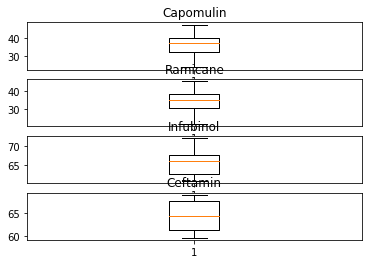

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulindata=data[(data["Timepoint"]==45)&(data["Drug Regimen"]=="Capomulin")]["Tumor Volume (mm3)"]
Ramicanedata=data[(data["Timepoint"]==45)&(data["Drug Regimen"]=="Ramicane")]["Tumor Volume (mm3)"]
Infubinoldata=data[(data["Timepoint"]==45)&(data["Drug Regimen"]=="Infubinol")]["Tumor Volume (mm3)"]
Ceftamindata=data[(data["Timepoint"]==45)&(data["Drug Regimen"]=="Ceftamin")]["Tumor Volume (mm3)"]

green_diamond = dict(markerfacecolor='g', marker='D')

fig1,(ax1,ax2,ax3,ax4)=plt.subplots(4)
ax1.set_title("Capomulin")
ax1.boxplot(Capomulindata,flierprops=green_diamond)

ax2.set_title("Ramicane")
ax2.boxplot(Ramicanedata,flierprops=green_diamond)

ax3.set_title("Infubinol")
ax3.boxplot(Infubinoldata,flierprops=green_diamond)

ax4.set_title("Ceftamin")
ax4.boxplot(Ceftamindata,flierprops=green_diamond)

## Line and scatter plots

Text(0.5, 1.0, 'Mouse-S185 treated via Capomulin')

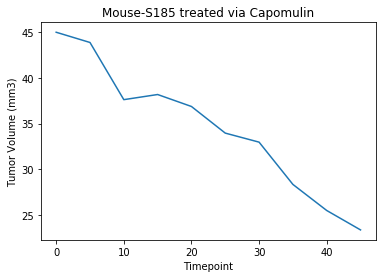

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mousedata=data[(data["Drug Regimen"]=="Capomulin")&(data["Mouse ID"]=="s185")]
mousedata
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse-S185 treated via Capomulin")

Text(0.5, 1.0, 'Capomulin')

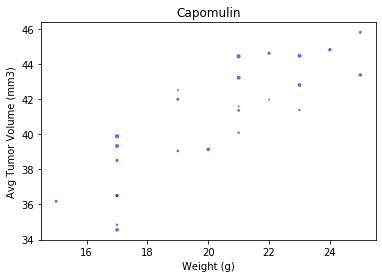

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterdata=data[(data["Drug Regimen"]=="Capomulin")]
newscatterdata=scatterdata.groupby(["Mouse ID"])
weight=newscatterdata["Weight (g)"].mean()
avgvolume=newscatterdata["Tumor Volume (mm3)"].mean()
plt.scatter(weight,avgvolume,marker="o",facecolor="blue",edgecolor="blue",s=x,alpha=0.5)
plt.xlabel("Weight (g)")
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title("Capomulin")

Text(0.5, 1.0, 'Capomulin')

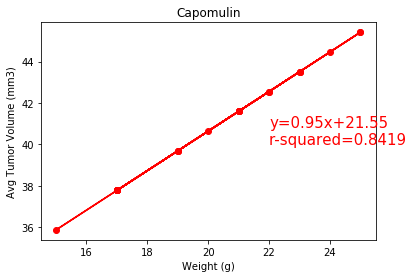

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
results=st.linregress(weight,avgvolume)
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(weight,avgvolume)
regressvalue=(weight)*slope+intercept
lineeq=f"y={slope:.2f}x+{intercept:.2f}\nr-squared={rvalue:.4f}"
plt.plot(weight,regressvalue,"r-o")
plt.annotate(lineeq,(22,40),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title("Capomulin")